In [1]:
# load Providentia interactive class
from providentia import Interactive
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# magic to make plots appear inline
%matplotlib inline

In [3]:
# read and filter data from .conf 
provi = Interactive(conf='foci_wang.conf', section='AERONET1.5_FLAGL2')

Generating file trees...
Reading data

OBSERVATIONS
 - AERONET_v3_lev1.5|absae675-870aero
 - AERONET_v3_lev1.5|abswdaeaero
 - AERONET_v3_lev1.5|absod440aero
 - AERONET_v3_lev1.5|absod675aero
 - AERONET_v3_lev1.5|absod870aero

Resetting filter for AERONET1.5_FLAGL2
Filtering data


In [4]:
# get data
data = provi.get_data(format='nc')
wda = data['AERONET_v3_lev1.5|abswdaeaero_data'][0,:,:]
aae = data['AERONET_v3_lev1.5|absae675-870aero_data'][0,:,:]

In [5]:
# get seasonal averages
wda_seas_ave = np.nanmean(wda.reshape(wda.shape[0], -1, 12), axis=-1)
aae_seas_ave = np.nanmean(aae.reshape(aae.shape[0], -1, 12), axis=-1)

# get indices of stations which have data for 3 months in at least 6 years
n_invalid_months = np.count_nonzero(np.isnan(wda_seas_ave), axis=-1)

# set station data with more than 4 years of missing data to NaN
wda_seas_ave[n_invalid_months > 4, :] = np.NaN
aae_seas_ave[n_invalid_months > 4, :] = np.NaN

# get multi-year average
wda_multiyear_ave = np.nanmean(wda_seas_ave, axis=-1)
aae_multiyear_ave = np.nanmean(aae_seas_ave, axis=-1)

(413, 120)
(413,)


In [7]:
# load mie bounds
mie_theory = np.genfromtxt('aae_wda_mie_obiso.csv', delimiter=',', names=True)

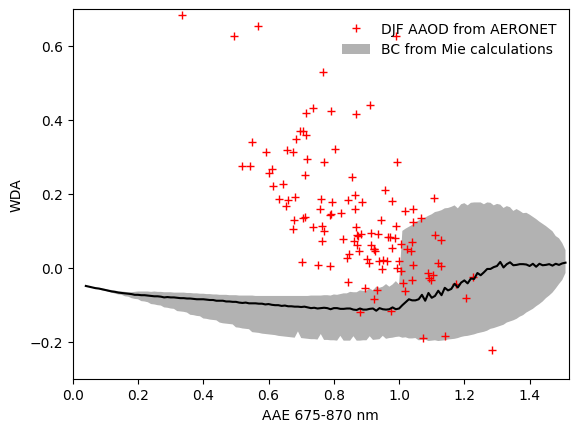

In [19]:
# make Wang plot
plt.plot(aae_multiyear_ave, wda_multiyear_ave, marker='+', linestyle='None', color='red', label='DJF AAOD from AERONET')
plt.plot(mie_theory['AAEstr'], mie_theory['WDAmed'], linestyle='-', color='black')
plt.fill_between(mie_theory['AAEstr'], mie_theory['WDAmax'], mie_theory['WDAmin'], facecolor='black', alpha=0.3, label='BC from Mie calculations')
plt.xlabel('AAE 675-870 nm')
plt.ylabel('WDA')
plt.xlim(0, 1.52)
plt.ylim(-0.3, 0.7)
plt.legend(frameon=False)
plt.show()